In [1]:
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk import SnowballStemmer
nlp = spacy.load("en_core_web_sm")
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
import seaborn as sns
from datetime import datetime

plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone Project/preprocessed_data2.csv')

In [4]:
df = df.dropna().reset_index()

In [5]:
df.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText,Review_Length
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,159
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,135
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection century light pillowy citrus gela...,288
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,133
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy...,88


In [6]:
from datetime import datetime
df['Time'] = df['Time'].apply(lambda x: datetime.utcfromtimestamp(x))

In [7]:
df.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText,Review_Length
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,159
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,135
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,confection century light pillowy citrus gela...,288
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,133
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy...,88


In [8]:
df['Year'] = df['Time'].dt.year

In [9]:
df.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText,Review_Length,Year
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,159,2011
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,135,2012
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,confection century light pillowy citrus gela...,288,2008
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,133,2011
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy...,88,2012


In [10]:
set(df['Year'])

{1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012}

In [10]:
df['Month'] = df['Time'].dt.month

In [17]:
score_counts  = df.groupby(['Score','Year','Month']).size().unstack(fill_value=0)

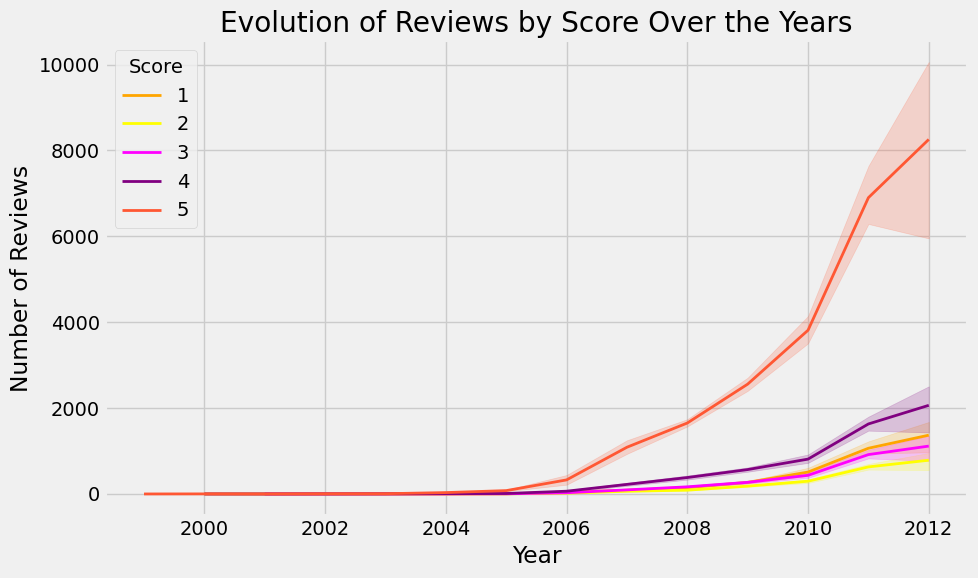

In [18]:

# Define custom colors
colors = ['#FFA500', '#FFFF00', '#FF00FF', '#800080', '#FF5733']

# Reshape the DataFrame to long-form
score_counts_long = score_counts.stack().reset_index(name='Number of Reviews')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=score_counts_long, x='Year', y='Number of Reviews', hue='Score', palette=colors, linewidth=2)

plt.title('Evolution of Reviews by Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
score_counts = df.groupby(['Score', 'Year']).size().unstack(fill_value=0)

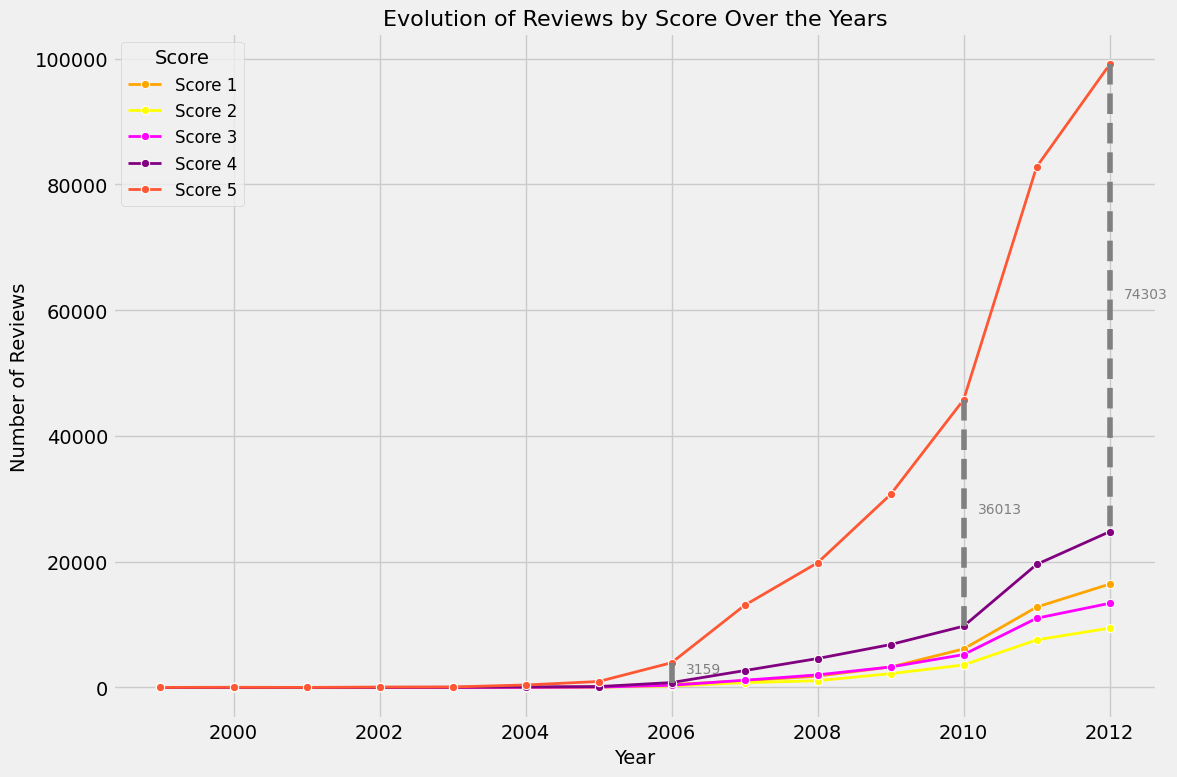

In [15]:
colors = ['#FFA500', '#FFFF00', '#FF00FF', '#800080', '#FF5733']

# Reshape the DataFrame to long-form
score_counts_long = score_counts.stack().reset_index(name='Number of Reviews')

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each score to plot lines with different colors and styles
for score, color in zip(range(1, 6), colors):
    sns.lineplot(data=score_counts_long[score_counts_long['Score'] == score],
                 x='Year', y='Number of Reviews',
                 label=f'Score {score}',
                 color=color,
                 linewidth=2,
                 marker='o',  # Add markers
                 markersize=6,  # Adjust marker size
                 linestyle='-')  # Solid line style

# Calculate the highest and second-highest scores for specific years
years_to_highlight = [2006, 2010, 2012]
for year in years_to_highlight:
    max_score = score_counts.loc[:, year].idxmax()
    second_max_score = score_counts.drop(max_score, axis=0).loc[:, year].idxmax()
    max_score_value = score_counts.loc[max_score, year]
    second_max_score_value = score_counts.loc[second_max_score, year]

    # Add dashed line between highest and second-highest scores
    plt.plot([year, year], [max_score_value, second_max_score_value], color='gray', linestyle='--')

    # Annotate the difference between the scores
    difference = max_score_value - second_max_score_value
    plt.text(year + 0.2, (max_score_value + second_max_score_value) / 2,
             f'{difference}', fontsize=10, color='gray')

plt.title('Evolution of Reviews by Score Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.legend(title='Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

To study the presence of trends in products over time in your dataset, you can analyze the frequency of products' appearances or the frequency of certain keywords in product names or reviews over different years. Here's a general approach you can follow:

Data Preparation:

If you have product names or descriptions, you can preprocess them to extract relevant keywords or features.
Convert the 'Time' column to datetime and extract the year to facilitate time-based analysis.
Explore Product Trends:

Group the data by year and analyze the frequency of products or keywords over time.
Plot the frequency trends using line plots or bar plots.
Identify Trends:

Look for increasing or decreasing trends in product frequency over the years.
Use statistical techniques or visualization tools to identify significant changes or patterns.
Analyze Reviews:

Analyze the sentiment of reviews over time to identify trends in product satisfaction or dissatisfaction.
Explore the topics or themes mentioned in reviews using techniques like topic modeling.
Visualization:

Visualize the trends and patterns using line plots, bar plots, heatmaps, or other appropriate visualization techniques.
Consider using interactive visualizations for exploring large datasets.

## Topic Analysis

In the script above we use the CountVectorizer class from the sklearn.feature_extraction.text module to create a document-term matrix. We specify to only include those words that appear in less than 80% of the document and appear in at least 2 documents. We also remove all the stop words as they do not really contribute to topic modeling.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2)
doc_term_matrix = count_vect.fit_transform(df['ProcessedText'])

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In the script above we use the LatentDirichletAllocation class from the sklearn.decomposition library to perform LDA on our document-term matrix. The parameter n_components specifies the number of categories, or topics, that we want our text to be divided into. The parameter random_state (aka the seed) is set to 42.

Let's randomly fetch words from our vocabulary. We know that the count vectorizer contains all the words in our vocabulary. We can use the get_feature_names() method and pass it the ID of the word that we want to fetch.

In [22]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 30 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 30 words for topic #0:
['snack', 'even', 'tried', 'eat', 'try', 'little', 'year', 'order', 'much', 'make', 'bought', 'best', 'chip', 'really', 'price', 'box', 'time', 'bag', 'get', 'buy', 'find', 'flavor', 'amazon', 'product', 'store', 'taste', 'good', 'love', 'great', 'nt']


Top 30 words for topic #1:
['baby', 'first', 'old', 'really', 'problem', 'month', 'great', 'chicken', 'ingredient', 'well', 'even', 'bag', 'little', 'give', 'much', 'year', 'also', 'good', 'day', 'eat', 'time', 'get', 'love', 'product', 'treat', 'cat', 'nt', 'dog', 'food', 'br']


Top 30 words for topic #2:
['vanilla', 'much', 'really', 'bag', 'best', 'tried', 'buy', 'order', 'roast', 'blend', 'use', 'pod', 'time', 'strong', 'love', 'box', 'make', 'bean', 'get', 'amazon', 'great', 'price', 'product', 'taste', 'flavor', 'good', 'nt', 'cup', 'br', 'coffee']


Top 30 words for topic #3:
['rice', 'protein', 'much', 'snack', 'ingredient', 'eat', 'little', 'sweet', 'really', 'fat', 'calorie', 'peanut', 'also', 'cer

- Topic #0: Snack chips with great flavor and price, available on Amazon or in stores.
- Topic #1: Pet treats, possibly for cats and dogs, enjoyed over time.
- Topic #2: Coffee pods known for their strong flavor and convenience.
- Topic #3: Low-calorie snacks or ingredients, such as peanut butter or cereal bars, with chocolate flavor.
- Topic #4: Bottled sweet drinks, possibly including green tea, enjoyed for their taste and convenience.

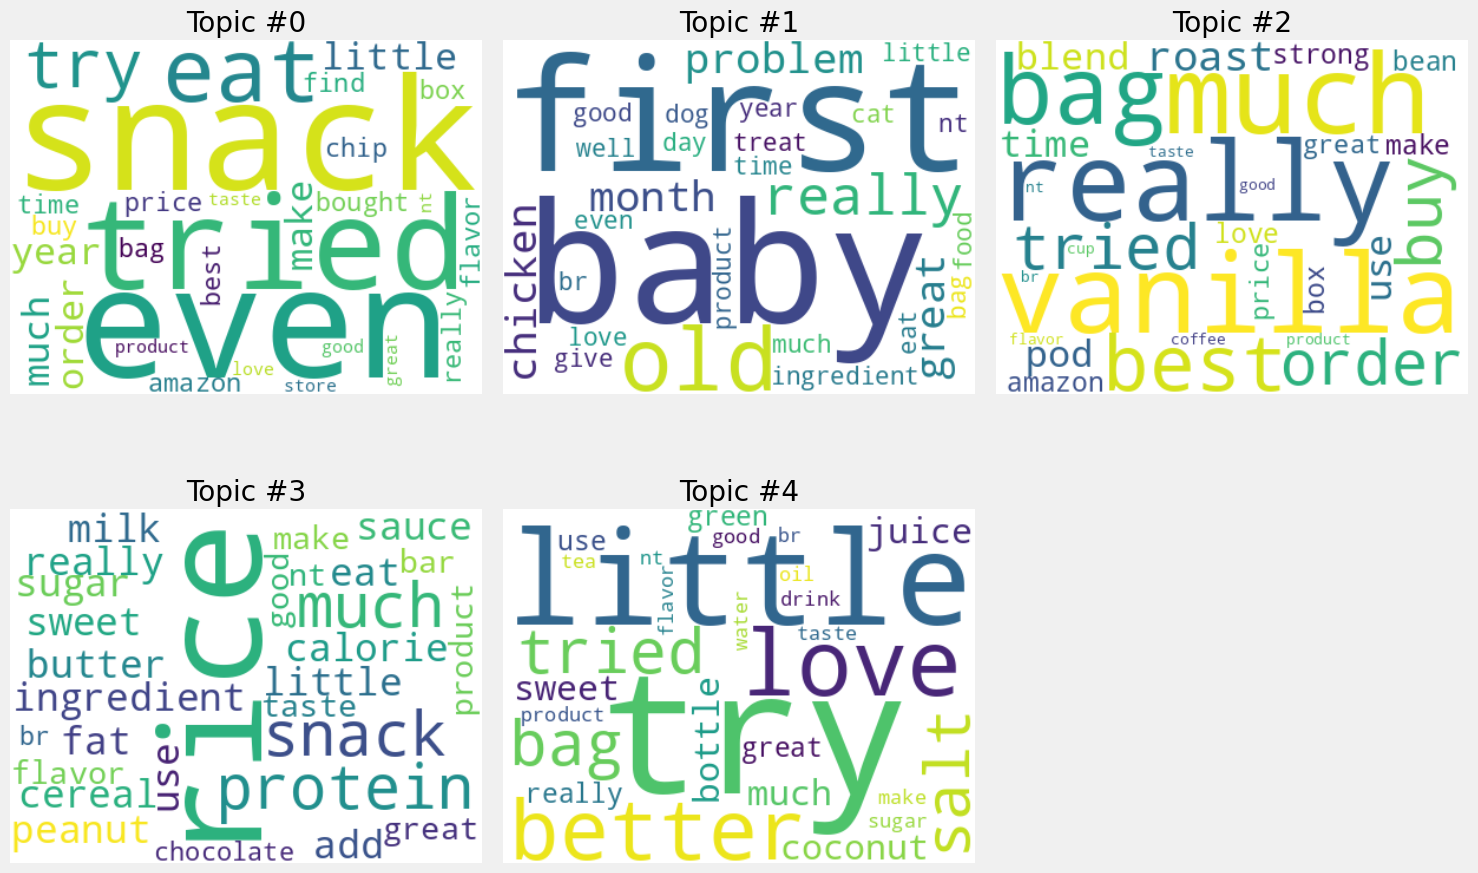

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Data for the top 30 words for each topic
topics_data= {
    'Topic #0': ['snack', 'even', 'tried', 'eat', 'try', 'little', 'year', 'order', 'much', 'make', 'bought', 'best', 'chip', 'really', 'price', 'box', 'time', 'bag', 'get', 'buy', 'find', 'flavor', 'amazon', 'product', 'store', 'taste', 'good', 'love', 'great', 'nt'],
    'Topic #1': ['baby', 'first', 'old', 'really', 'problem', 'month', 'great', 'chicken', 'ingredient', 'well', 'even', 'bag', 'little', 'give', 'much', 'year', 'also', 'good', 'day', 'eat', 'time', 'get', 'love', 'product', 'treat', 'cat', 'nt', 'dog', 'food', 'br'],
    'Topic #2': ['vanilla', 'much', 'really', 'bag', 'best', 'tried', 'buy', 'order', 'roast', 'blend', 'use', 'pod', 'time', 'strong', 'love', 'box', 'make', 'bean', 'get', 'amazon', 'great', 'price', 'product', 'taste', 'flavor', 'good', 'nt', 'cup', 'br', 'coffee'],
    'Topic #3': ['rice', 'protein', 'much', 'snack', 'ingredient', 'eat', 'little', 'sweet', 'really', 'fat', 'calorie', 'peanut', 'also', 'cereal', 'add', 'sauce', 'milk', 'use', 'butter', 'sugar', 'great', 'make', 'product', 'bar', 'flavor', 'good', 'nt', 'taste', 'chocolate', 'br'],
    'Topic #4': ['try', 'little', 'love', 'better', 'tried', 'salt', 'bag', 'juice', 'coconut', 'get', 'bottle', 'sweet', 'much', 'also', 'really', 'great', 'green', 'use', 'product', 'oil', 'make', 'sugar', 'good', 'water', 'drink', 'nt', 'flavor', 'taste', 'tea', 'br']
}

# Plot word clouds for each topic
plt.figure(figsize=(15, 10))
for i, (topic, words) in enumerate(topics_data.items(), 1):
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(' '.join(words))
    plt.subplot(2, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(topic)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [15]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(469164, 5)

In [16]:
df['Topic'] = topic_values.argmax(axis=1)

In [17]:
df.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText,Review_Length,Year,Topic
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,159,2011,1
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,135,2012,3
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,confection century light pillowy citrus gela...,288,2008,3
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,133,2011,4
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy...,88,2012,0


In [23]:
# Define a mapping dictionary

topic_mapping = {
    0: "Snack chips with great flavor and price, available on Amazon or in stores",
    1: "Pet treats, possibly for cats and dogs, enjoyed over time",
    2: "Coffee pods known for their strong flavor and convenience",
    3: "Low-calorie snacks or ingredients, such as peanut butter or cereal bars, with chocolate flavor",
    4: "Bottled sweet drinks, possibly including green tea, enjoyed for their taste and convenience"
}


# Replace numeric labels with corresponding topics
df['TopicContext'] = df['Topic'].map(topic_mapping)

In [25]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/Capstone Project/time_series_data_final.csv')

In [25]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone Project/time_series_data_final.csv')

In [26]:
df['Month'] = df['Time'].apply(lambda x: x.split('-')[1])

In [27]:
df['Month'] = df['Month'].apply(lambda x: int(x))

In [28]:
df.head()

,Unnamed: 0,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText,Review_Length,Year,Topic,TopicContext,Month
0,0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,159,2011,1,"Pet treats, possibly for cats and dogs, enjoye...",4
1,1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,135,2012,3,"Low-calorie snacks or ingredients, such as pea...",9
2,2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,confection century light pillowy citrus gela...,288,2008,3,"Low-calorie snacks or ingredients, such as pea...",8
3,3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,133,2011,4,"Bottled sweet drinks, possibly including green...",6
4,4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy...,88,2012,0,"Snack chips with great flavor and price, avail...",10


In [29]:
topic_counts = df.groupby(['Topic', 'Year', 'Month']).size().unstack(fill_value=0)

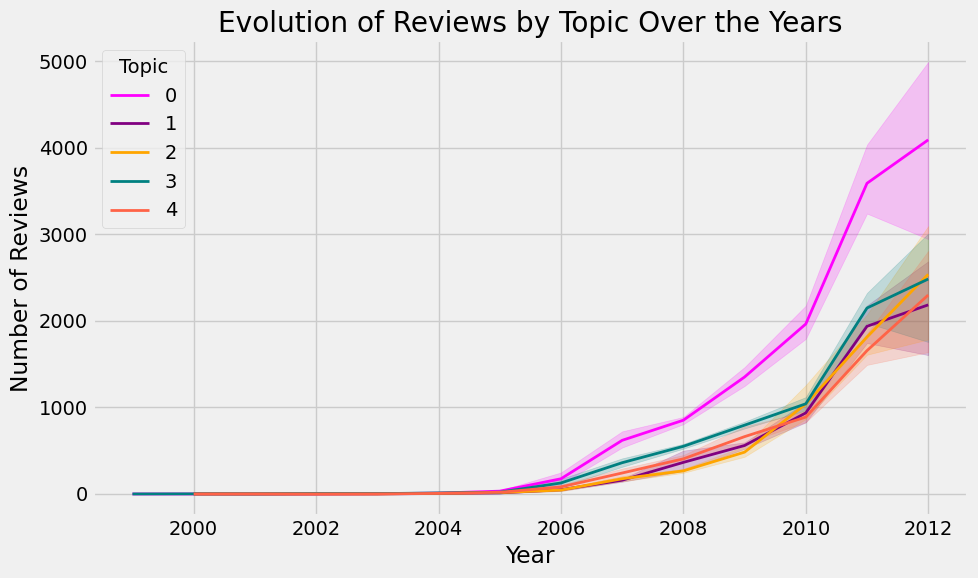

In [45]:
# Define custom colors
colors = sns.color_palette(['#FF00FF', '#800080', '#FFA500', '#008080', '#FF6347'])

# Reshape the DataFrame to long-form
topic_counts_long = topic_counts.stack().reset_index(name='Number of Reviews')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=topic_counts_long, x= 'Year', y='Number of Reviews', hue='Topic', palette=colors, linewidth=2)

plt.title('Evolution of Reviews by Topic Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Topic')
plt.grid(True)
plt.tight_layout()
plt.show()

## Trend Over Years for Topic 0

In [33]:
score_counts = df[df.Topic == 0].groupby(['Score', 'Year']).size().unstack(fill_value=0)

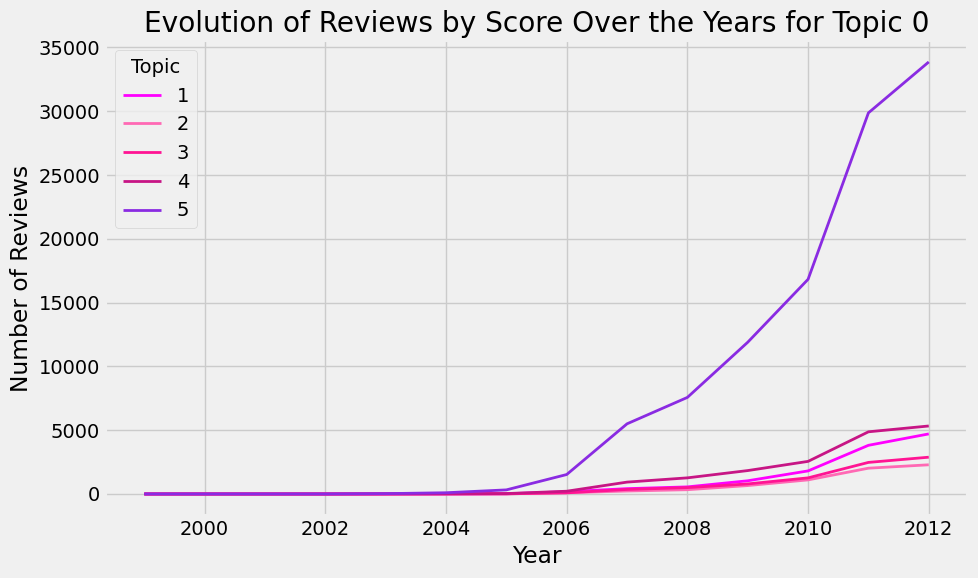

In [36]:
# Define custom colors
colors = sns.color_palette(['#FF00FF', '#FF69B4', '#FF1493', '#C71585', '#8A2BE2'])

# Reshape the DataFrame to long-form
score_counts_long = score_counts.stack().reset_index(name='Number of Reviews')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=score_counts_long, x='Year', y='Number of Reviews', hue='Score', palette=colors, linewidth=2)

plt.title('Evolution of Reviews by Score Over the Years for Topic 0')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Topic')
plt.grid(True)
plt.tight_layout()
plt.show()

## Trend Over Years for Topic 1

In [37]:
score_counts = df[df.Topic == 1].groupby(['Score', 'Year']).size().unstack(fill_value=0)

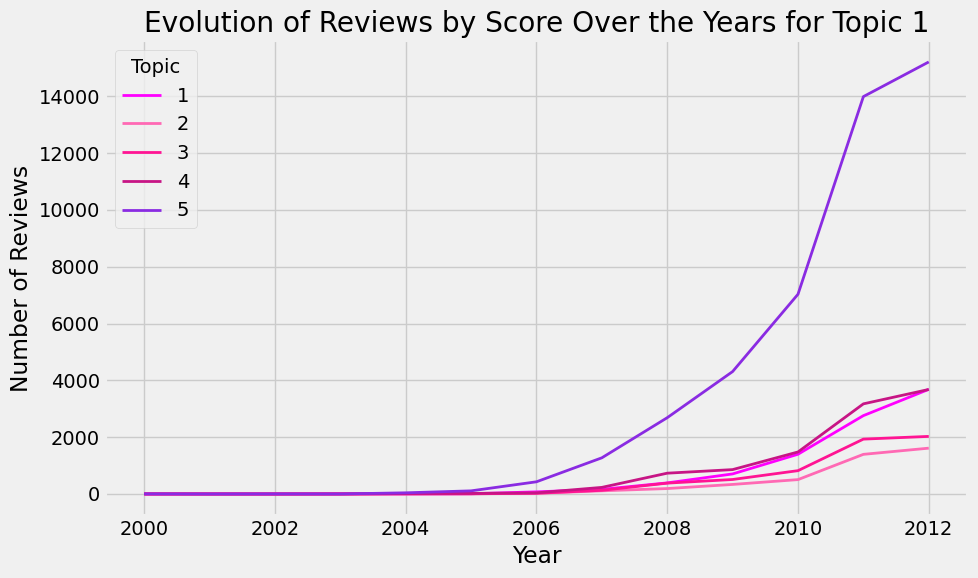

In [38]:
# Define custom colors
colors = sns.color_palette(['#FF00FF', '#FF69B4', '#FF1493', '#C71585', '#8A2BE2'])

# Reshape the DataFrame to long-form
score_counts_long = score_counts.stack().reset_index(name='Number of Reviews')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=score_counts_long, x='Year', y='Number of Reviews', hue='Score', palette=colors, linewidth=2)

plt.title('Evolution of Reviews by Score Over the Years for Topic 1')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Topic')
plt.grid(True)
plt.tight_layout()
plt.show()

# ARIMA Model for Trend Prediction

## Check for stationarity (Find I)

In [30]:
topic_counts = df.groupby(['Topic', 'Year', 'Month']).size().unstack(fill_value=0)

In [31]:
topic_counts.head(20)

Month         1     2     3     4     5     6     7     8     9     10    11  \
Topic Year                                                                     
0     1999     0     0     0     0     0     0     0     0     0     2     0   
      2000     0     0     0     0     0     2     0     0     0     0     0   
      2001     0     1     0     0     0     0     0     0     0     0     0   
      2002     0     0     0     1     0     0     1     0     0     0     0   
      2003     0     0     0     0     1     0     0     0     0     3    21   
      2004    11     5     5     3    12    13    14    11    10    10     9   
      2005    20    35    12    22    13    22    42    39    50    43    40   
      2006    76    90    95    47    57   136   298   299   131   192   437   
      2007  1010   453   613   339   777   470   559   576   609   610   663   
      2008   881   881   685   757   765   843   910   874   911   879   893   
      2009  1243  1165  1261  1308  1258  1245  1125  1169  1662  1525  1554   
      2010  1844  1820  1755  1650  1659  1547  1927  1856  2230  2271  2294   
      2011  3303  2830  3389  3176  2935  3045  3250  3543  3925  4232  3975   
      2012  5974  4649  4652  4402  4450  4062  5369  4876  5581  5065     0   
1     2000     1     3     0     0     0     1     1     0     0     0     0   
      2001     0     0     0     0     1     0     0     0     0     0     0   
      2002     0     0     0     0     0     0     0     0     0     0     2   
      2003     0     0     0     0     3     1     2     0     0     1     0   
      2004     4     1     2     4     1     2    27     8     3     6     4   
      2005     8     8     7     8     8     3     4    16    22    24    15   

Month         12  
Topic Year        
0     1999     0  
      2000     0  
      2001     1  
      2002     1  
      2003    11  
      2004    21  
      2005    53  
      2006   248  
      2007   756  
      2008   946  
      2009  1698  
      2010  2710  
      2011  5459  
      2012     0  
1     2000     0  
      2001     0  
      2002     0  
      2003     0  
      2004     6  
      2005    28

In [32]:
# Assuming your DataFrame is named 'topic_counts'

# Stack the DataFrame to convert the columns 'Month' and 'Year' into rows
stacked_df = topic_counts.stack().reset_index()

# Rename the columns for clarity
stacked_df.columns = ['Topic', 'Year', 'Month', 'Number of Reviews']

# Combine 'Month' and 'Year' into a single column 'Time'
stacked_df['Time'] = stacked_df['Month'].astype(str) + '-' + stacked_df['Year'].astype(str)

# Drop the 'Month' and 'Year' columns
stacked_df.drop(columns=['Month', 'Year'], inplace=True)

# Sort by 'Time'
#stacked_df.sort_values(by='Time', inplace=True)

# Reset index
stacked_df.reset_index(drop=True, inplace=True)

# Print the transformed DataFrame
print(stacked_df)


     Topic  Number of Reviews     Time
0        0                  0   1-1999
1        0                  0   2-1999
2        0                  0   3-1999
3        0                  0   4-1999
4        0                  0   5-1999
..     ...                ...      ...
775      4               3051   8-2012
776      4               3061   9-2012
777      4               2547  10-2012
778      4                  0  11-2012
779      4                  0  12-2012

[780 rows x 3 columns]


In [33]:
stacked_df

,Topic,Number of Reviews,Time
0,0,0,1-1999
1,0,0,2-1999
2,0,0,3-1999
3,0,0,4-1999
4,0,0,5-1999
...,...,...,...
775,4,3051,8-2012
776,4,3061,9-2012
777,4,2547,10-2012
778,4,0,11-2012


In [34]:
stacked_df['Time'] = pd.to_datetime(stacked_df['Time'], format='%m-%Y')

In [35]:
row0 = stacked_df[stacked_df.Topic == 0][:-2]
row1 = stacked_df[stacked_df.Topic == 1][:-2]
row2 = stacked_df[stacked_df.Topic == 2][:-2]
row3 = stacked_df[stacked_df.Topic == 3][:-2]
row4 = stacked_df[stacked_df.Topic == 4][:-2]

I've added -2 because i need to remove the last two observations because we have missing data.

In [36]:
row0.head(20)

,Topic,Number of Reviews,Time
0,0,0,1999-01-01
1,0,0,1999-02-01
2,0,0,1999-03-01
3,0,0,1999-04-01
4,0,0,1999-05-01
5,0,0,1999-06-01
6,0,0,1999-07-01
7,0,0,1999-08-01
8,0,0,1999-09-01
9,0,2,1999-10-01


In [37]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result0 = adfuller(row0['Number of Reviews'])
result1 = adfuller(row1['Number of Reviews'])
result2 = adfuller(row2['Number of Reviews'])
result3 = adfuller(row3['Number of Reviews'])
result4 = adfuller(row4['Number of Reviews'])

In [38]:
from tabulate import tabulate

results = [
    ('Topic 0', result0[0], result0[1]),
    ('Topic 1', result1[0], result1[1]),
    ('Topic 2', result2[0], result2[1]),
    ('Topic 3', result3[0], result3[1]),
    ('Topic 4', result4[0], result4[1])
]

headers = ['Topic', 'ADF Statistics', 'p-value']

print(tabulate(results, headers=headers))


Topic      ADF Statistics    p-value
-------  ----------------  ---------
Topic 0         0.528269    0.985707
Topic 1         0.0945135   0.965685
Topic 2         6.88608     1
Topic 3         1.03964     0.994667
Topic 4         2.73801     0.999088


The ADF statistic measures the significance of the unit root hypothesis. A more negative ADF statistic suggests a stronger rejection of the null hypothesis (the presence of a unit root), indicating stationarity.

The p-value indicates the probability of observing the ADF statistic if the null hypothesis (the presence of a unit root) were true. A smaller p-value suggests stronger evidence against the null hypothesis.

Based on the results you provided:

For Topic 0, the ADF statistic is -4.04971 with a p-value of 0.00117146.
For Topic 1, the ADF statistic is -4.78486 with a p-value of 5.81305e-05.
For Topic 2, the ADF statistic is -1.10497 with a p-value of 0.713085.
For Topic 3, the ADF statistic is -4.77379 with a p-value of 6.10254e-05.
For Topic 4, the ADF statistic is -1.08506 with a p-value of 0.720993.
Based on the ADF statistics and p-values:

Topics 0, 1, and 3 have more negative ADF statistics and smaller p-values, suggesting that they are likely stationary.
Topics 2 and 4 have less negative ADF statistics and larger p-values, suggesting that they are likely non-stationary.

In [40]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.4 MB/s eta 0:00:00


In [41]:
from pmdarima.arima.utils import ndiffs
results = []
for row in [row0['Number of Reviews'], row1['Number of Reviews'], row2['Number of Reviews'], row3['Number of Reviews'], row4['Number of Reviews']]:
## Adf Test
  result = ndiffs(row, test='adf')
  results.append(result)

In [42]:
results

[1, 1, 1, 1, 1]

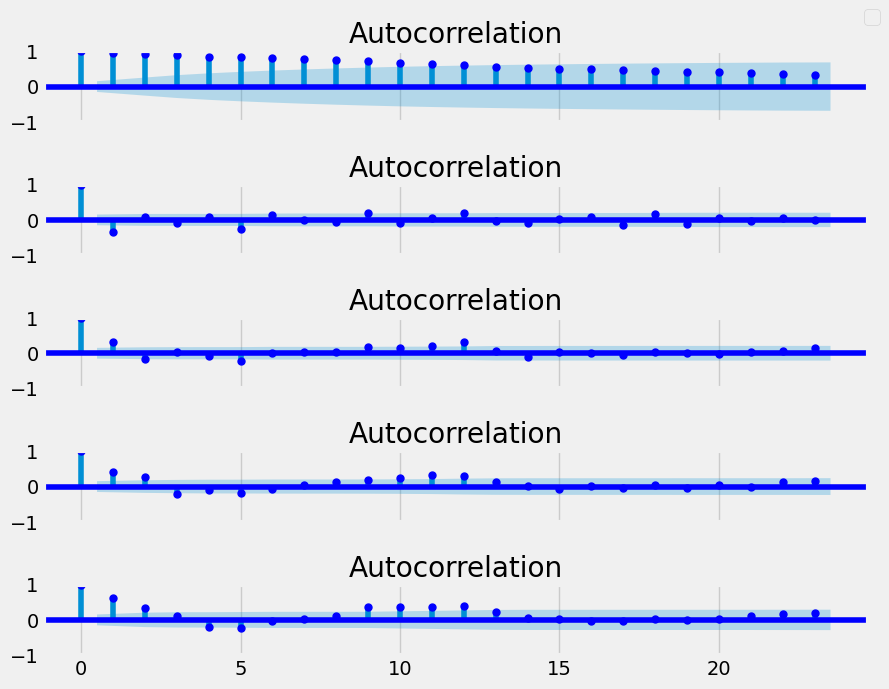

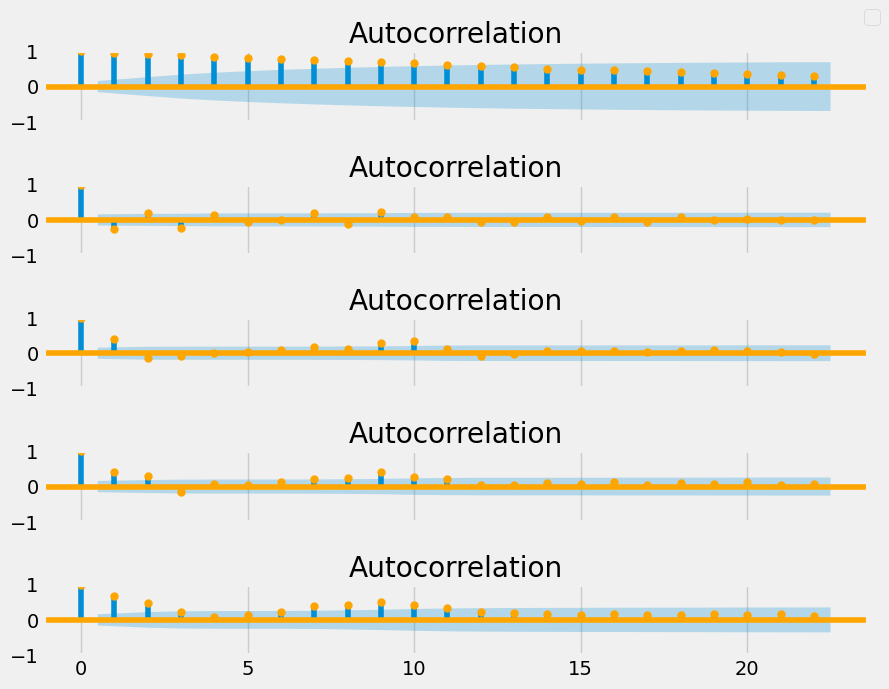

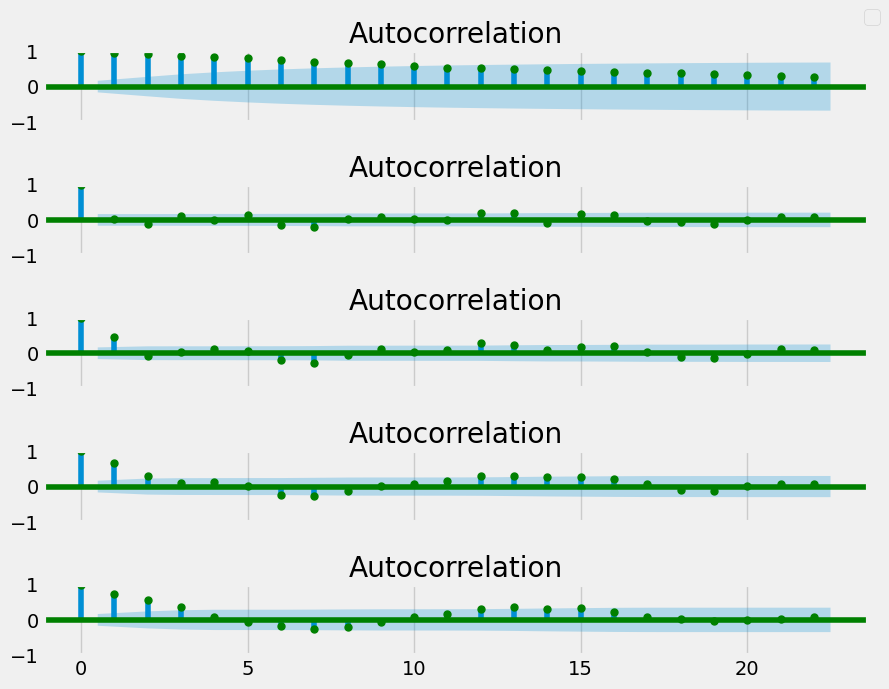

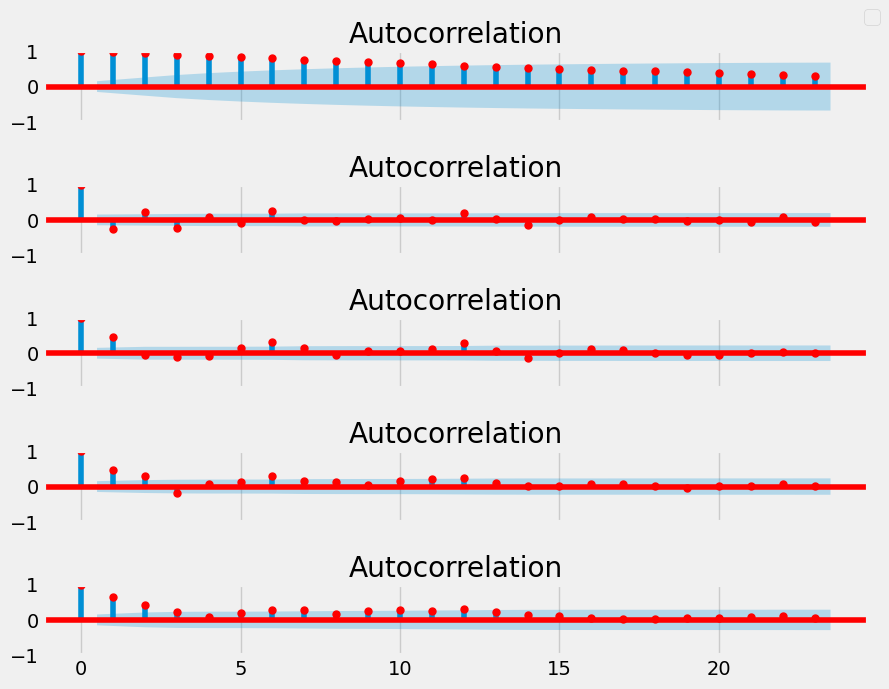

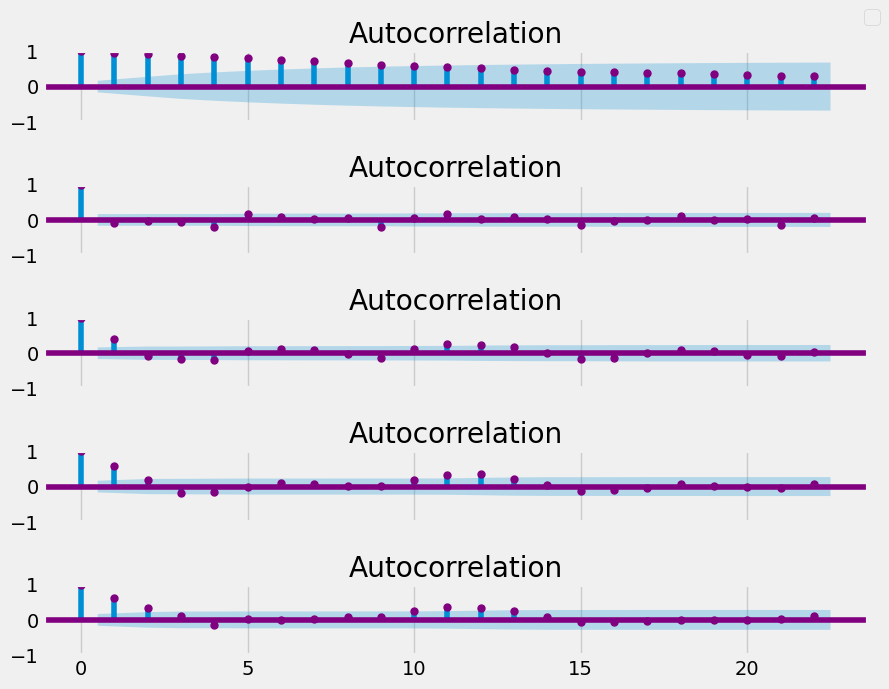

In [194]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})

# Define the rows (row0 to row4)
rows = [row0, row1, row2, row3, row4]

# Define colors for each row
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, row in enumerate(rows):
    row = pd.Series(row['Number of Reviews'])

    # Original Series
    fig, axes = plt.subplots(5, 1, sharex=True)
    plot_acf(row, ax=axes[0], color=colors[i])

    # Differencing
    for j in range(1, 5):
        diff_order = j
        diff_series = row.diff(diff_order)
        plot_acf(diff_series.dropna(), ax=axes[j], color=colors[i])

    # Add legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

    plt.tight_layout()
    plt.show()

### Find AR Components

Now, how to find the number of AR terms?

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

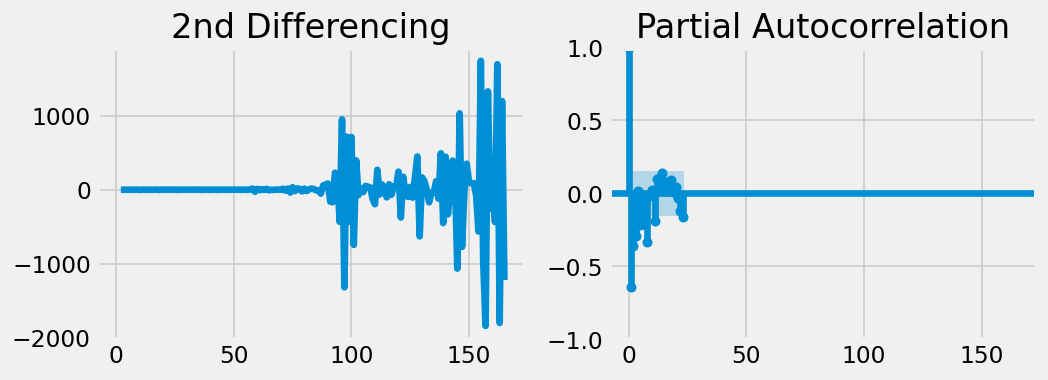

In [195]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
row = pd.Series(row0['Number of Reviews'])
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(row.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(row.diff().diff().dropna(), ax=axes[1])

plt.show()

We can use an AR 1 for all the models.

## Create ARIMA

In [61]:
!pip install statsmodels


### Topic 1

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming row0 contains your time series data
# Define the ARIMA model with the appropriate order (p,d,q)
model = ARIMA(row0['Number of Reviews'], order=(2, 1, 1))  # For example, ARIMA(1,2,1)

# Fit the ARIMA model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:      Number of Reviews   No. Observations:                  166
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1140.147
Date:                Thu, 07 Mar 2024   AIC                           2288.295
Time:                        13:56:51   BIC                           2300.719
Sample:                             0   HQIC                          2293.338
                                - 166                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2458      0.059    -21.223      0.000      -1.361      -1.131
ar.L2         -0.2503      0.047     -5.308      0.000      -0.343      -0.158
ma.L1          0.9656      0.051     18.856      0.0

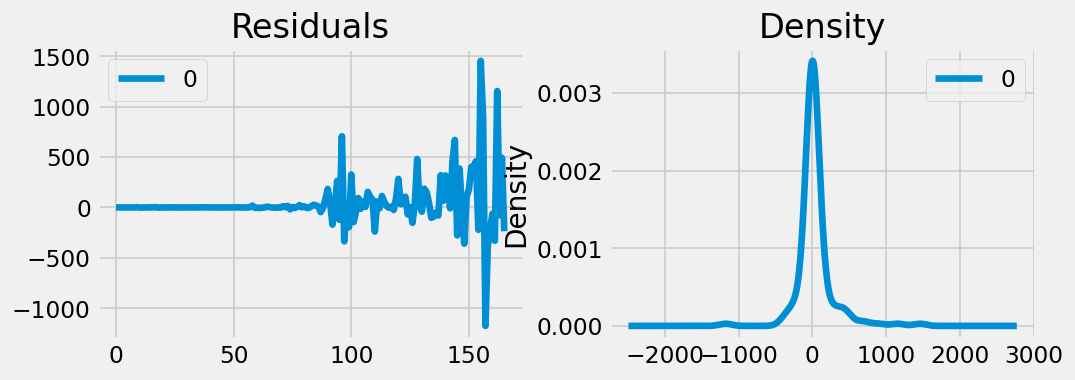

In [197]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

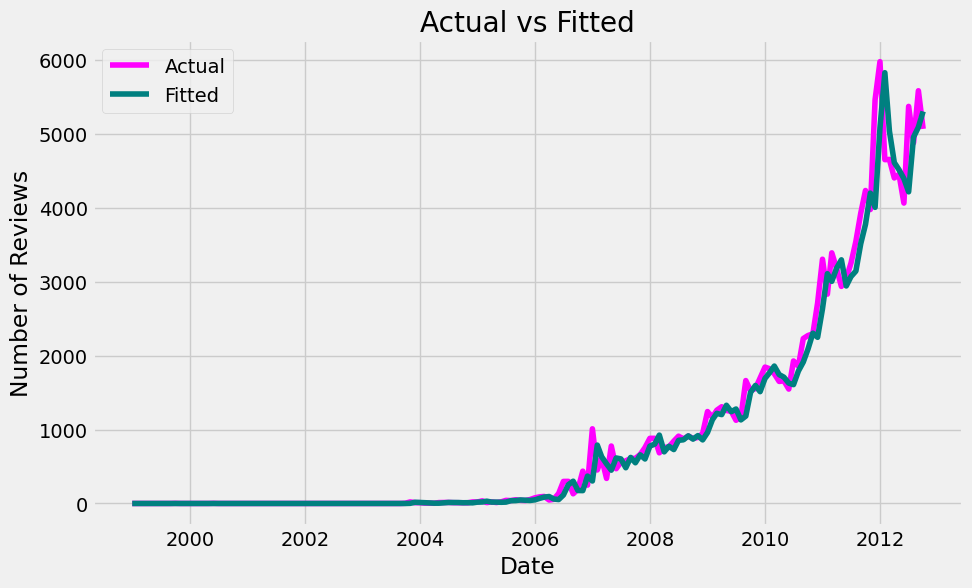

In [47]:
import matplotlib.pyplot as plt
colors = ['#FF00FF','#008080' ]
# Get the fitted values
fitted_values = model_fit.fittedvalues

# Plot actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(row0['Time'], row0['Number of Reviews'], color = colors[0] , label='Actual')
plt.plot(row0['Time'], fitted_values, color = colors[1] , label='Fitted')
plt.title('Actual vs Fitted')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()


In [199]:
# Predict future values for the next 100 time periods
forecast_values = model_fit.forecast(steps=100)

# Print the forecasted values
print(forecast_values)

166    5303.045900
167    5135.644108
168    5284.611641
169    5140.926728
170    5282.644779
          ...     
261    5171.346856
262    5252.629405
263    5171.834196
264    5252.144987
265    5172.315710
Name: predicted_mean, Length: 100, dtype: float64


In [149]:
forecast_values

166    5303.045900
167    5135.644108
168    5284.611641
169    5140.926728
170    5282.644779
          ...     
261    5171.346856
262    5252.629405
263    5171.834196
264    5252.144987
265    5172.315710
Name: predicted_mean, Length: 100, dtype: float64

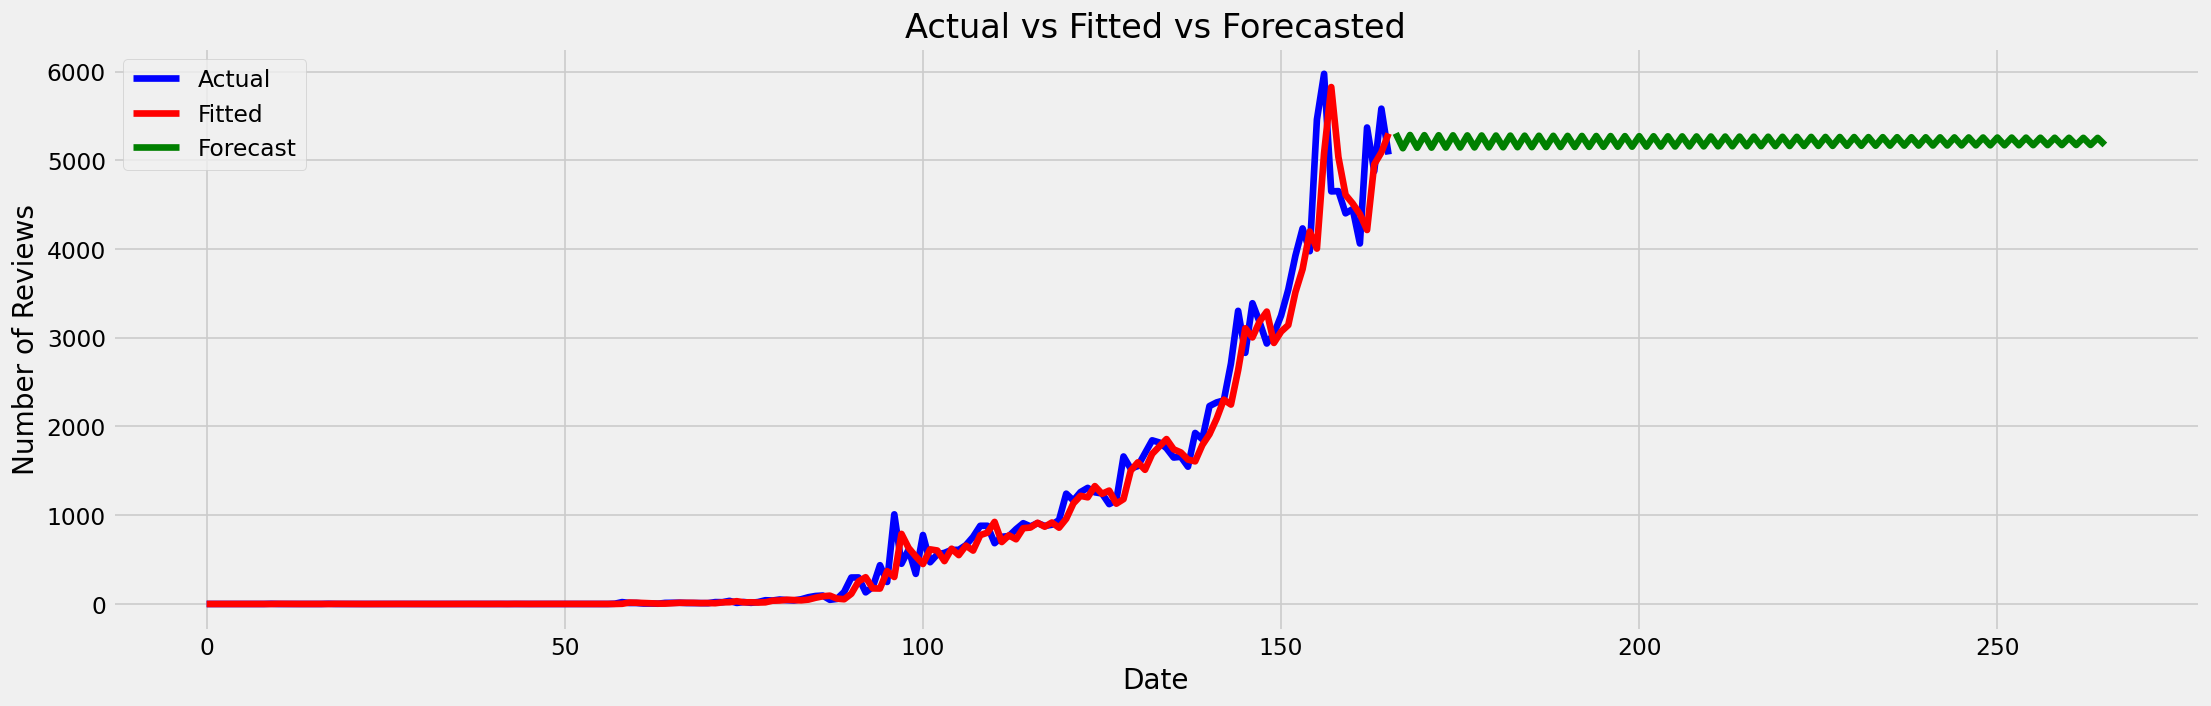

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Get the fitted values
fitted_values = model_fit.fittedvalues

# Forecast future values for the next 10 years (assuming 100 time periods per year)
forecast_values = model_fit.forecast(steps=100)


# Plot actual vs fitted values
plt.figure(figsize=(20, 6))
plt.plot(row0['Number of Reviews'], label='Actual', color='blue')
plt.plot(fitted_values, color='red', label='Fitted')
plt.plot(forecast_values, color='green', label='Forecast')
plt.title('Actual vs Fitted vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()


# ARIMA Model for Trend Prediction -> 5 Scores

## Check for stationarity (Find I)

In [162]:
topic_counts = df[df.Score == 5].groupby(['Topic', 'Year', 'Month']).size().unstack(fill_value=0)

In [163]:
topic_counts.head(20)

Month         1     2     3     4     5     6     7     8     9     10    11  \
Topic Year                                                                     
0     1999     0     0     0     0     0     0     0     0     0     2     0   
      2000     0     0     0     0     0     2     0     0     0     0     0   
      2001     0     1     0     0     0     0     0     0     0     0     0   
      2002     0     0     0     1     0     0     1     0     0     0     0   
      2003     0     0     0     0     0     0     0     0     0     3    16   
      2004     8     5     5     2    10     8     8     9     9     9     7   
      2005    17    26     9    22    11    15    32    32    41    38    35   
      2006    58    57    64    33    46   106   219   230    90   135   313   
      2007   772   325   472   269   572   335   372   411   462   443   500   
      2008   653   695   557   552   579   571   661   648   665   663   638   
      2009   931   867   952   965   910   895   832   831  1230  1155  1122   
      2010  1356  1347  1273  1237  1233  1128  1303  1291  1507  1651  1594   
      2011  2356  2014  2362  2219  2041  2114  2224  2396  2667  2982  2821   
      2012  4156  3210  3258  3048  3004  2751  3692  3396  3807  3546     0   
1     2000     1     0     0     0     0     1     1     0     0     0     0   
      2002     0     0     0     0     0     0     0     0     0     0     2   
      2003     0     0     0     0     0     0     1     0     0     0     0   
      2004     3     0     2     3     1     2    11     8     2     5     2   
      2005     7     4     6     1     5     3     2    15    16    19     9   
      2006    14    24    16    23    14    28    40    71    34    34    89   

Month         12  
Topic Year        
0     1999     0  
      2000     0  
      2001     1  
      2002     1  
      2003     8  
      2004    17  
      2005    43  
      2006   174  
      2007   567  
      2008   688  
      2009  1206  
      2010  1910  
      2011  3680  
      2012     0  
1     2000     0  
      2002     0  
      2003     0  
      2004     2  
      2005    23  
      2006    42

In [164]:
# Assuming your DataFrame is named 'topic_counts'

# Stack the DataFrame to convert the columns 'Month' and 'Year' into rows
stacked_df = topic_counts.stack().reset_index()

# Rename the columns for clarity
stacked_df.columns = ['Topic', 'Year', 'Month', 'Number of Reviews']

# Combine 'Month' and 'Year' into a single column 'Time'
stacked_df['Time'] = stacked_df['Month'].astype(str) + '-' + stacked_df['Year'].astype(str)

# Drop the 'Month' and 'Year' columns
stacked_df.drop(columns=['Month', 'Year'], inplace=True)

# Sort by 'Time'
#stacked_df.sort_values(by='Time', inplace=True)

# Reset index
stacked_df.reset_index(drop=True, inplace=True)

# Print the transformed DataFrame
print(stacked_df)


     Topic  Number of Reviews     Time
0        0                  0   1-1999
1        0                  0   2-1999
2        0                  0   3-1999
3        0                  0   4-1999
4        0                  0   5-1999
..     ...                ...      ...
763      4               1736   8-2012
764      4               1749   9-2012
765      4               1562  10-2012
766      4                  0  11-2012
767      4                  0  12-2012

[768 rows x 3 columns]


In [165]:
stacked_df

,Topic,Number of Reviews,Time
0,0,0,1-1999
1,0,0,2-1999
2,0,0,3-1999
3,0,0,4-1999
4,0,0,5-1999
...,...,...,...
763,4,1736,8-2012
764,4,1749,9-2012
765,4,1562,10-2012
766,4,0,11-2012


In [166]:
stacked_df['Time'] = pd.to_datetime(stacked_df['Time'], format='%m-%Y')

In [167]:
row0 = stacked_df[stacked_df.Topic == 0][:-2]
row1 = stacked_df[stacked_df.Topic == 1][:-2]
row2 = stacked_df[stacked_df.Topic == 2][:-2]
row3 = stacked_df[stacked_df.Topic == 3][:-2]
row4 = stacked_df[stacked_df.Topic == 4][:-2]

I've added -2 because i need to remove the last two observations because we have missing data.

In [168]:
row0.head(20)

,Topic,Number of Reviews,Time
0,0,0,1999-01-01
1,0,0,1999-02-01
2,0,0,1999-03-01
3,0,0,1999-04-01
4,0,0,1999-05-01
5,0,0,1999-06-01
6,0,0,1999-07-01
7,0,0,1999-08-01
8,0,0,1999-09-01
9,0,2,1999-10-01


In [169]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result0 = adfuller(row0['Number of Reviews'])
result1 = adfuller(row1['Number of Reviews'])
result2 = adfuller(row2['Number of Reviews'])
result3 = adfuller(row3['Number of Reviews'])
result4 = adfuller(row4['Number of Reviews'])

In [170]:
from tabulate import tabulate

results = [
    ('Topic 0', result0[0], result0[1]),
    ('Topic 1', result1[0], result1[1]),
    ('Topic 2', result2[0], result2[1]),
    ('Topic 3', result3[0], result3[1]),
    ('Topic 4', result4[0], result4[1])
]

headers = ['Topic', 'ADF Statistics', 'p-value']

print(tabulate(results, headers=headers))


Topic      ADF Statistics    p-value
-------  ----------------  ---------
Topic 0          0.797542   0.991596
Topic 1          0.33469    0.978881
Topic 2          4.80095    1
Topic 3          2.88254    1
Topic 4          2.2255     0.998903


The ADF statistic measures the significance of the unit root hypothesis. A more negative ADF statistic suggests a stronger rejection of the null hypothesis (the presence of a unit root), indicating stationarity.

The p-value indicates the probability of observing the ADF statistic if the null hypothesis (the presence of a unit root) were true. A smaller p-value suggests stronger evidence against the null hypothesis.

Based on the results you provided:

For Topic 0, the ADF statistic is -4.04971 with a p-value of 0.00117146.
For Topic 1, the ADF statistic is -4.78486 with a p-value of 5.81305e-05.
For Topic 2, the ADF statistic is -1.10497 with a p-value of 0.713085.
For Topic 3, the ADF statistic is -4.77379 with a p-value of 6.10254e-05.
For Topic 4, the ADF statistic is -1.08506 with a p-value of 0.720993.
Based on the ADF statistics and p-values:

Topics 0, 1, and 3 have more negative ADF statistics and smaller p-values, suggesting that they are likely stationary.
Topics 2 and 4 have less negative ADF statistics and larger p-values, suggesting that they are likely non-stationary.

In [ ]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00


In [171]:
from pmdarima.arima.utils import ndiffs
results = []
for row in [row0['Number of Reviews'], row1['Number of Reviews'], row2['Number of Reviews'], row3['Number of Reviews'], row4['Number of Reviews']]:
## Adf Test
  result = ndiffs(row, test='adf')
  results.append(result)

In [172]:
results

[1, 1, 1, 1, 1]

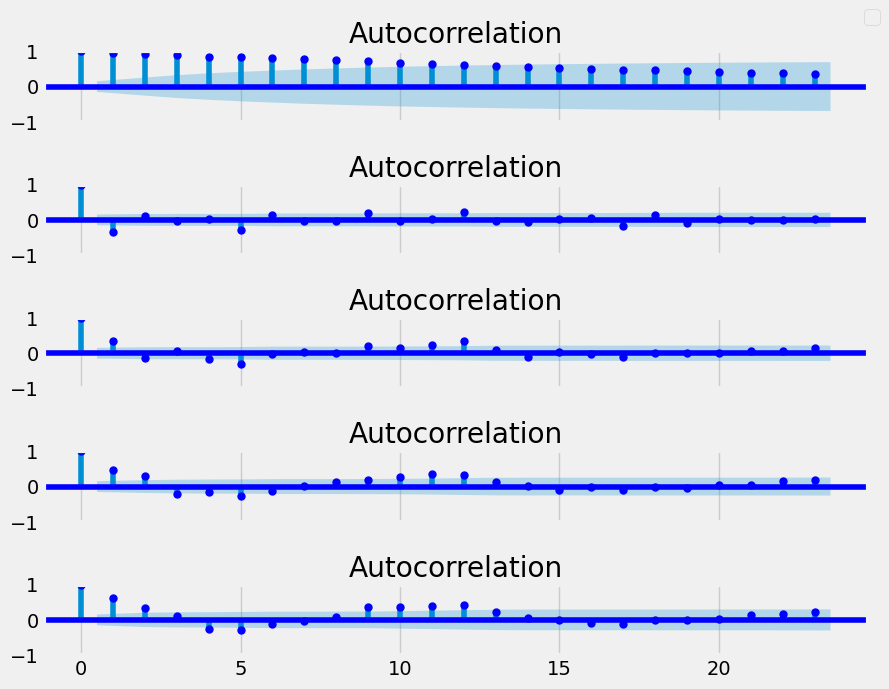

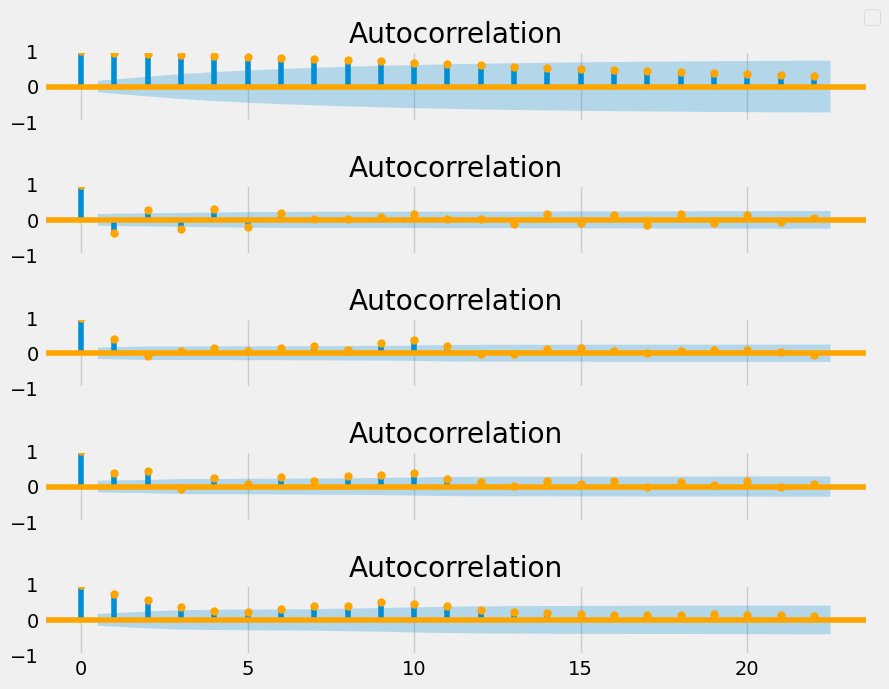

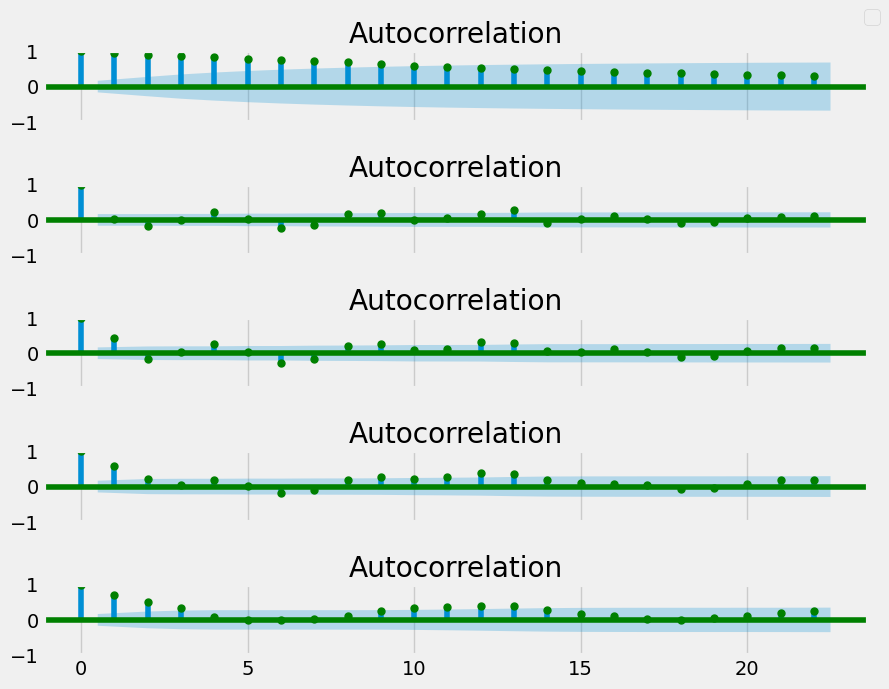

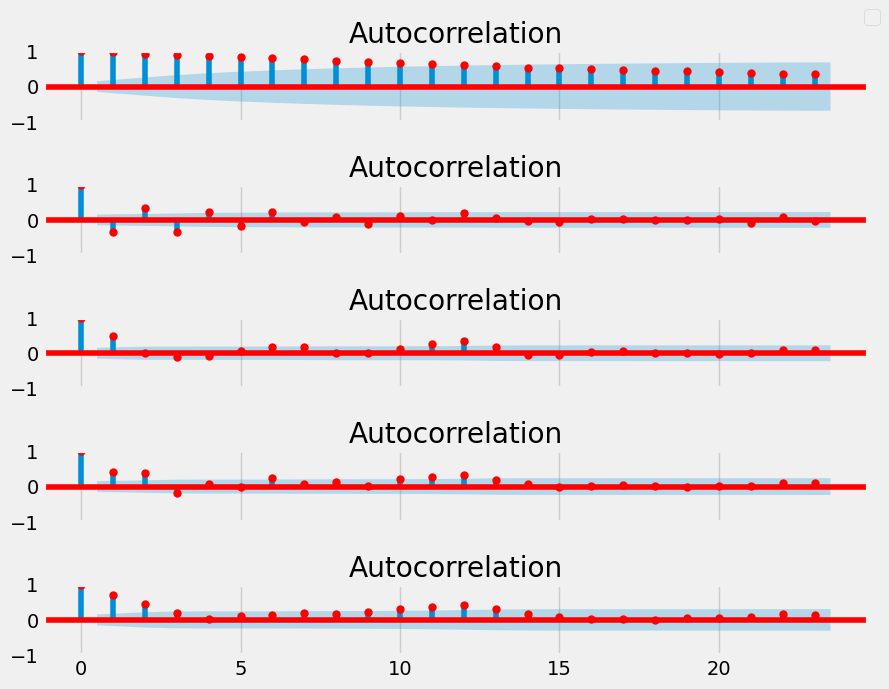

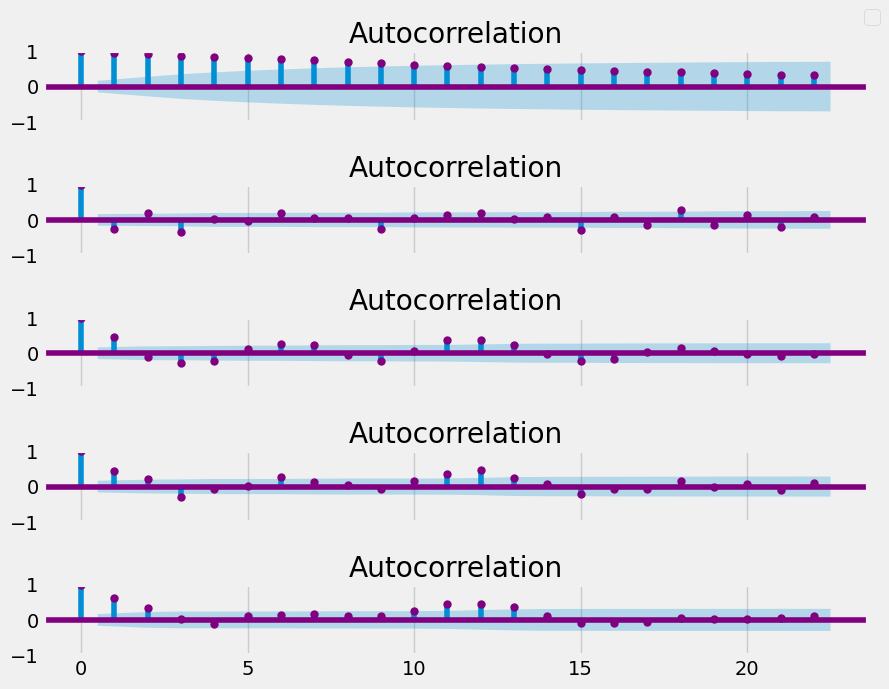

In [173]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})

# Define the rows (row0 to row4)
rows = [row0, row1, row2, row3, row4]

# Define colors for each row
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, row in enumerate(rows):
    row = pd.Series(row['Number of Reviews'])

    # Original Series
    fig, axes = plt.subplots(5, 1, sharex=True)
    plot_acf(row, ax=axes[0], color=colors[i])

    # Differencing
    for j in range(1, 5):
        diff_order = j
        diff_series = row.diff(diff_order)
        plot_acf(diff_series.dropna(), ax=axes[j], color=colors[i])

    # Add legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

    plt.tight_layout()
    plt.show()

### Find AR Components

Now, how to find the number of AR terms?

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

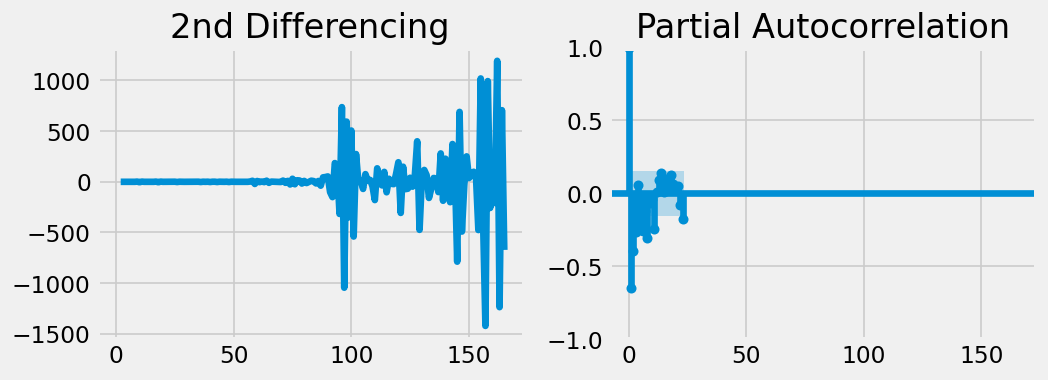

In [174]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
row = pd.Series(row0['Number of Reviews'])
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(row.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(row.diff().diff().dropna(), ax=axes[1])

plt.show()

We can use an AR 1 for all the models.

## Create ARIMA

In [ ]:
!pip install statsmodels


### Topic 1

In [175]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming row0 contains your time series data
# Define the ARIMA model with the appropriate order (p,d,q)
model = ARIMA(row0['Number of Reviews'], order=(2, 1, 1))  # For example, ARIMA(1,2,1)

# Fit the ARIMA model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:      Number of Reviews   No. Observations:                  166
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1079.984
Date:                Thu, 07 Mar 2024   AIC                           2167.968
Time:                        09:41:19   BIC                           2180.392
Sample:                             0   HQIC                          2173.011
                                - 166                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6418      0.091      7.042      0.000       0.463       0.820
ar.L2          0.3499      0.037      9.561      0.000       0.278       0.422
ma.L1         -0.9702      0.085    -11.454      0.0

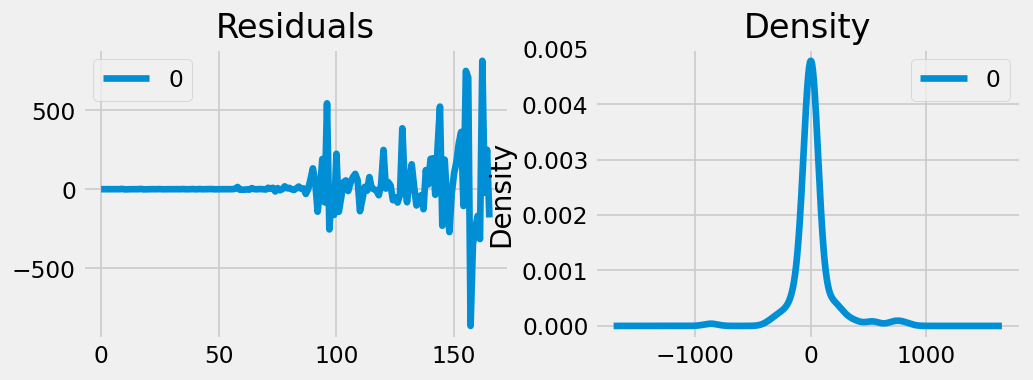

In [176]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

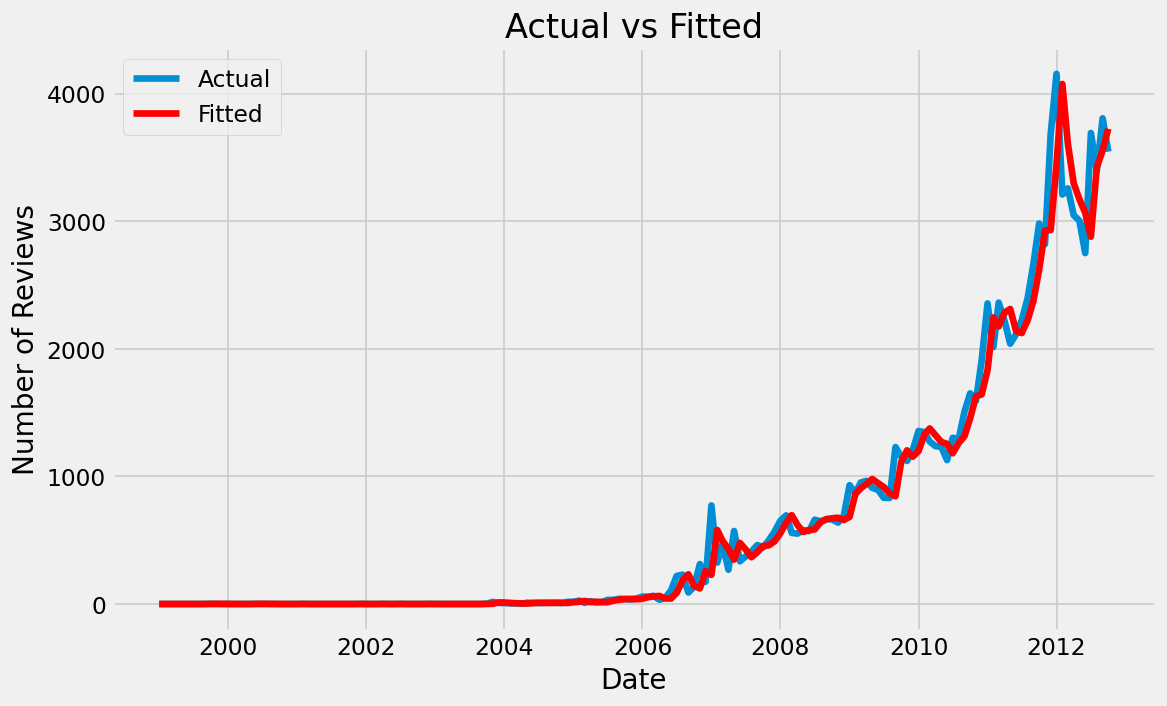

In [177]:
import matplotlib.pyplot as plt

# Get the fitted values
fitted_values = model_fit.fittedvalues

# Plot actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(row0['Time'], row0['Number of Reviews'], label='Actual')
plt.plot(row0['Time'], fitted_values, color='red', label='Fitted')
plt.title('Actual vs Fitted')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()


In [178]:
# Predict future values for the next 100 time periods
forecast_values = model_fit.forecast(steps=100)

# Print the forecasted values
print(forecast_values)

166    3696.124989
167    3701.137175
168    3756.888986
169    3794.423331
170    3838.022024
          ...     
261    6753.306824
262    6777.150860
263    6800.848912
264    6824.401874
265    6847.810634
Name: predicted_mean, Length: 100, dtype: float64


In [179]:
forecast_values

166    3696.124989
167    3701.137175
168    3756.888986
169    3794.423331
170    3838.022024
          ...     
261    6753.306824
262    6777.150860
263    6800.848912
264    6824.401874
265    6847.810634
Name: predicted_mean, Length: 100, dtype: float64

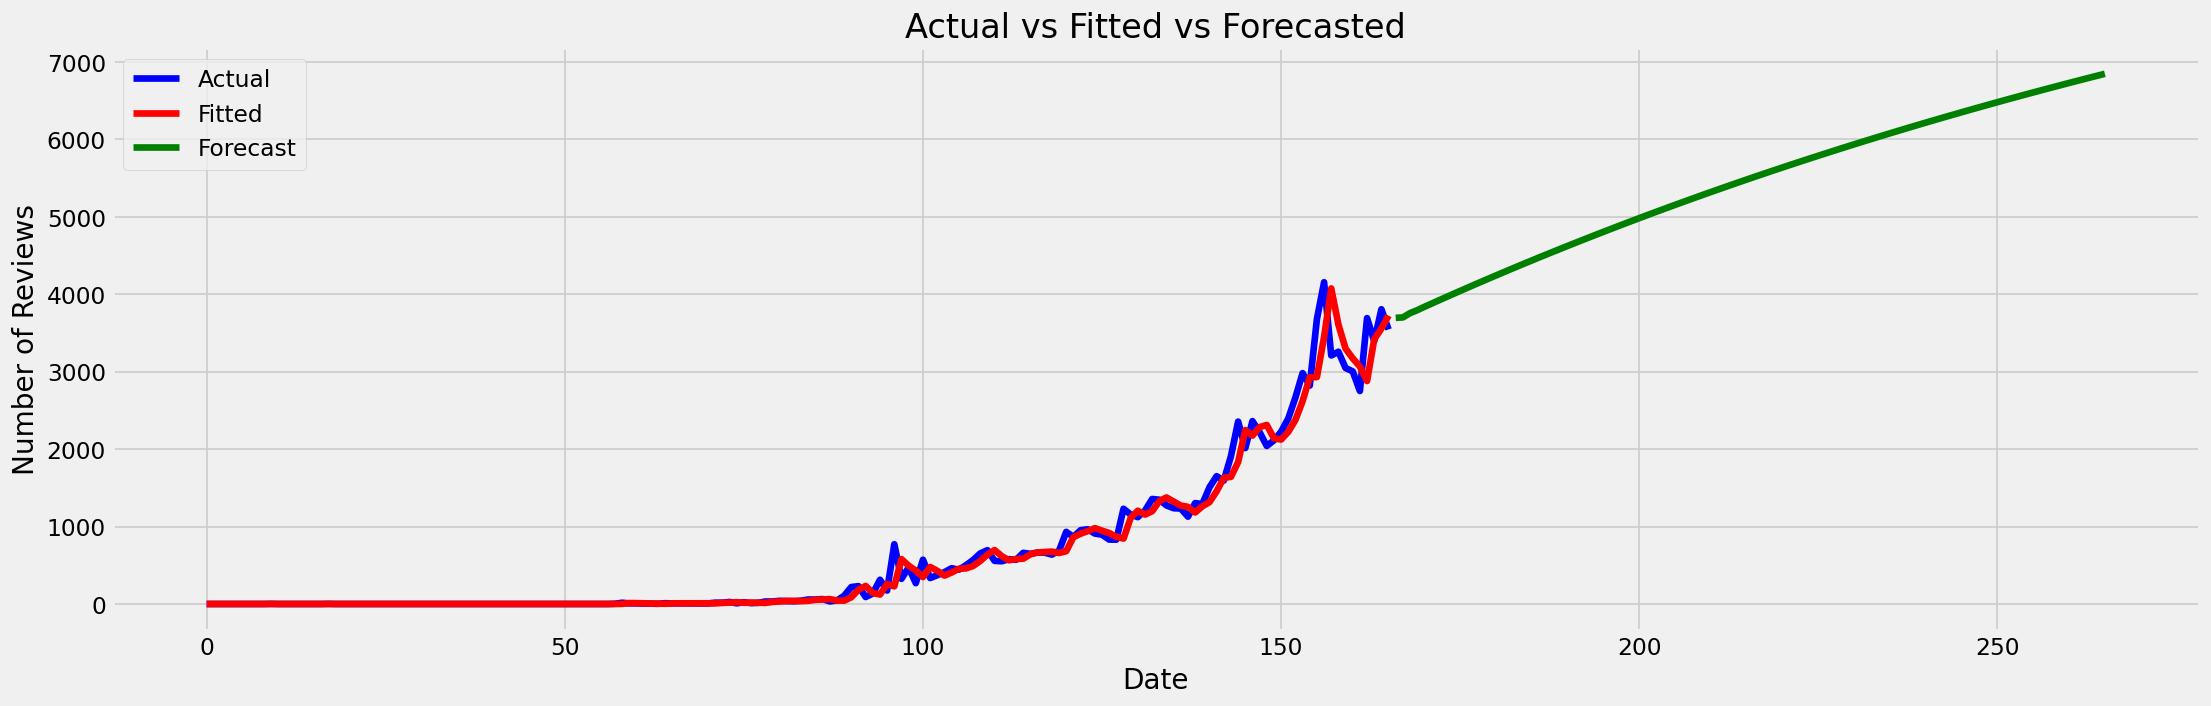

In [182]:
import matplotlib.pyplot as plt
import numpy as np

# Get the fitted values
fitted_values = model_fit.fittedvalues

# Forecast future values for the next 10 years (assuming 100 time periods per year)
forecast_values = model_fit.forecast(steps=100)


# Plot actual vs fitted values
plt.figure(figsize=(20, 6))
plt.plot(row0['Number of Reviews'], label='Actual', color='blue')
plt.plot(fitted_values, color='red', label='Fitted')
plt.plot(forecast_values, color='green', label='Forecast')
plt.title('Actual vs Fitted vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()
